# Model for the HR department to predict the Attrition and give the insights from the data

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [3]:
df_attrition=pd.read_csv("HR_Employee_Attrition_Data.csv")


In [4]:
pd.set_option('display.max_columns',None)

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df_attrition.shape

(2940, 35)

In [7]:
df_attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [8]:
#Complusory Drop Id type of features

In [9]:
df_attrition.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [10]:
df_attrition['Attrition'].value_counts()

No     2466
Yes     474
Name: Attrition, dtype: int64

In [11]:
df_attrition['target']=np.where(df_attrition['Attrition']=='Yes',1,0)

In [12]:
# Drop the Attrition features to retain only target varibales
df_attrition=df_attrition.drop(["Attrition"],axis=1)

In [13]:
#Defining Independent and Dependent features
Y=df_attrition['target']
X=df_attrition.drop(['target'],axis=1)

In [14]:
#Get the attrition Rate
Y.mean()

0.16122448979591836

In [15]:
#Split the features in Numerical and Categorical
num=X.select_dtypes(include='number')
char=X.select_dtypes(include='object')

In [16]:
num.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,3,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,4,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,5,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


In [17]:
char.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [18]:
#Outliers Analysis of Numerical Features
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.90,0.99])

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1470.500000,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,0.0,848.849221,1.092896,20.325969,0.711440,1.106752,1.102658,4707.155770,7116.575021,2.497584,3.659315,0.360762,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
1%,19.000000,117.000000,1.000000,1.000000,1.0,30.390000,1.000000,30.000000,1.000000,1.000000,1.000000,1372.260000,2324.170000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
5%,24.000000,164.000000,1.000000,1.000000,1.0,147.950000,1.000000,33.000000,1.000000,1.000000,1.000000,2097.000000,3376.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
10%,26.000000,242.800000,1.000000,1.000000,1.0,294.900000,1.000000,38.000000,2.000000,1.000000,1.000000,2317.600000,4603.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,735.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8045.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1470.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,2205.250000,4.000000,84.000000,3.000000,3.000000,4.000000,8380.000000,20462.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [19]:
#Capping and Flooring of Outliers
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return x

In [20]:
num=num.apply(lambda x: outlier_cap(x))

In [21]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.90,0.99])

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.921871,802.482993,9.192517,2.912925,1.0,1470.500000,2.721769,65.891156,2.729932,2.063946,2.728571,6503.306156,14312.605544,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.268707,2.799320,2.761224,6.980272,4.214966,2.178912,4.102721
std,9.104845,403.191626,8.105485,1.023991,0.0,848.329778,1.092896,20.325969,0.711440,1.106752,1.102658,4699.853209,7110.879597,2.497584,3.659315,0.360762,1.081025,0.0,0.851932,7.709195,1.289051,0.706356,6.003879,3.575851,3.187884,3.503121
min,19.000000,117.000000,1.000000,1.000000,1.0,30.390000,1.000000,30.000000,1.000000,1.000000,1.000000,1372.260000,2324.170000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
1%,19.000000,117.000000,1.000000,1.000000,1.0,30.627900,1.000000,30.000000,1.000000,1.000000,1.000000,1380.348600,2324.883700,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
5%,24.000000,164.000000,1.000000,1.000000,1.0,147.950000,1.000000,33.000000,1.000000,1.000000,1.000000,2097.000000,3376.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
10%,26.000000,242.800000,1.000000,1.000000,1.0,294.900000,1.000000,38.000000,2.000000,1.000000,1.000000,2317.600000,4603.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,735.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8045.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1470.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,2205.250000,4.000000,84.000000,3.000000,3.000000,4.000000,8380.000000,20462.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [22]:
#Missing vale analysis
num.isnull().mean()

Age                         0.0
DailyRate                   0.0
DistanceFromHome            0.0
Education                   0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobSatisfaction             0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtCompany              0.0
YearsInCurrentRole          0.0
YearsSinceLastPromotion     0.0
YearsWithCurrManager        0.0
dtype: float64

In [23]:
#Feature Selection
#Part 1:Removes features with zero variance check
from sklearn.feature_selection import VarianceThreshold

varselector=VarianceThreshold(threshold=0)
varselector.fit_transform(num)
#Get columns to keep and create new dataframe with those only
cols=varselector.get_support(indices=True)
num_1=num.iloc[:,cols]

In [24]:
num_1.iloc[0]

Age                            41.00
DailyRate                    1102.00
DistanceFromHome                1.00
Education                       2.00
EmployeeNumber                 30.39
EnvironmentSatisfaction         2.00
HourlyRate                     94.00
JobInvolvement                  3.00
JobLevel                        2.00
JobSatisfaction                 4.00
MonthlyIncome                5993.00
MonthlyRate                 19479.00
NumCompaniesWorked              8.00
PercentSalaryHike              11.00
PerformanceRating               3.00
RelationshipSatisfaction        1.00
StockOptionLevel                0.00
TotalWorkingYears               8.00
TrainingTimesLastYear           0.00
WorkLifeBalance                 1.00
YearsAtCompany                  6.00
YearsInCurrentRole              4.00
YearsSinceLastPromotion         0.00
YearsWithCurrManager            5.00
Name: 0, dtype: float64

In [25]:
#Part 2:Bivariate Analysis(Feature Discretization)
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num_1),index=num_1.index,columns=num_1.columns).add_suffix('_Rank')
num_binned.head()

,Age_Rank,DailyRate_Rank,DistanceFromHome_Rank,Education_Rank,EmployeeNumber_Rank,EnvironmentSatisfaction_Rank,HourlyRate_Rank,JobInvolvement_Rank,JobLevel_Rank,JobSatisfaction_Rank,MonthlyIncome_Rank,MonthlyRate_Rank,NumCompaniesWorked_Rank,PercentSalaryHike_Rank,PerformanceRating_Rank,RelationshipSatisfaction_Rank,StockOptionLevel_Rank,TotalWorkingYears_Rank,TrainingTimesLastYear_Rank,WorkLifeBalance_Rank,YearsAtCompany_Rank,YearsInCurrentRole_Rank,YearsSinceLastPromotion_Rank,YearsWithCurrManager_Rank
0,7.0,7.0,0.0,1.0,0.0,1.0,9.0,2.0,1.0,2.0,6.0,7.0,6.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,4.0,0.0,4.0
1,8.0,1.0,4.0,0.0,0.0,2.0,4.0,1.0,1.0,1.0,5.0,9.0,1.0,7.0,0.0,2.0,1.0,5.0,2.0,2.0,7.0,5.0,1.0,5.0
2,5.0,9.0,1.0,1.0,0.0,2.0,8.0,1.0,0.0,2.0,0.0,0.0,5.0,4.0,0.0,1.0,0.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0
3,3.0,9.0,2.0,3.0,0.0,2.0,3.0,2.0,0.0,2.0,2.0,8.0,1.0,0.0,0.0,2.0,0.0,4.0,2.0,2.0,5.0,5.0,2.0,0.0
4,1.0,3.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,3.0,5.0,6.0,1.0,0.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


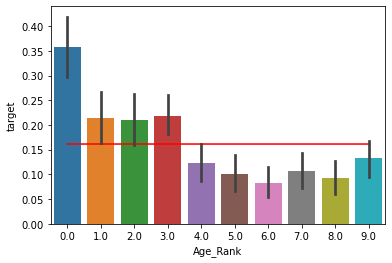

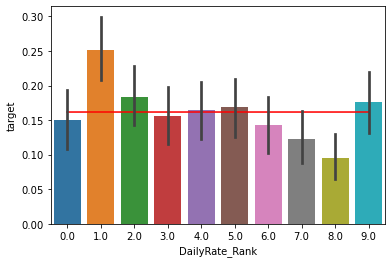

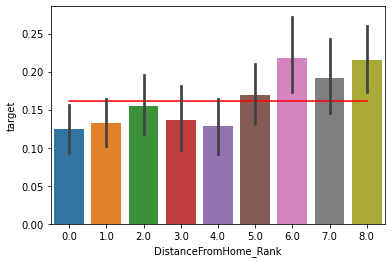

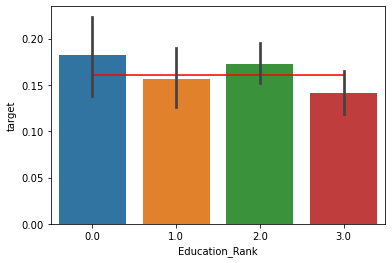

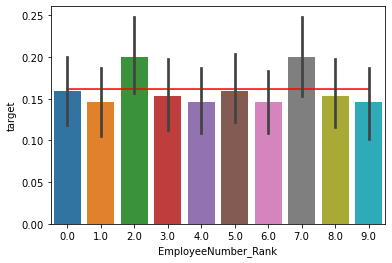

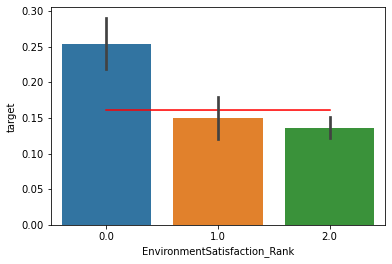

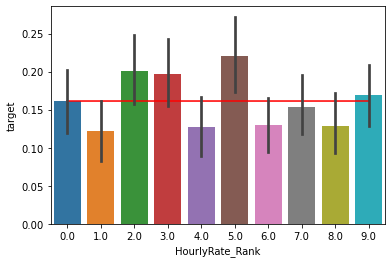

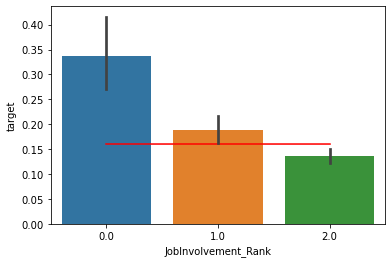

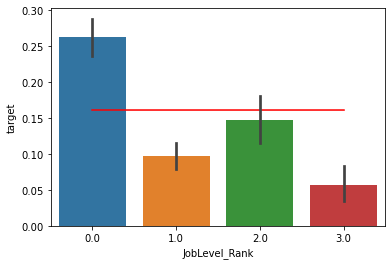

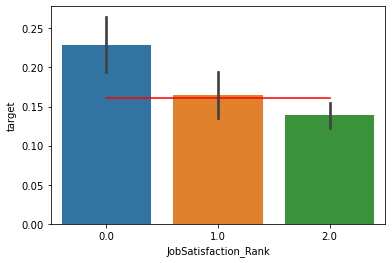

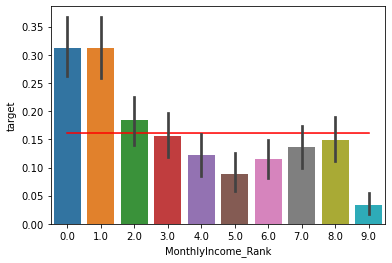

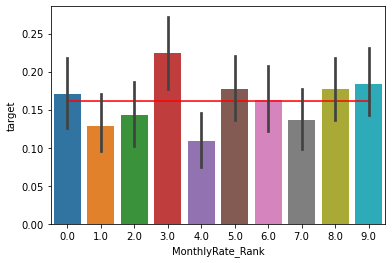

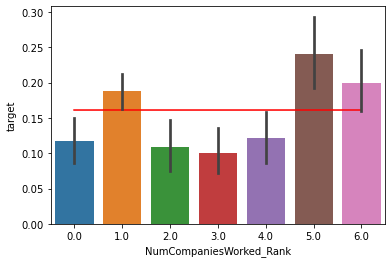

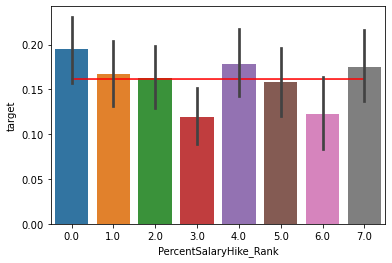

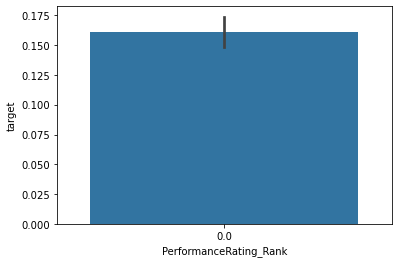

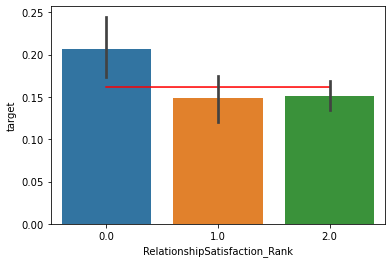

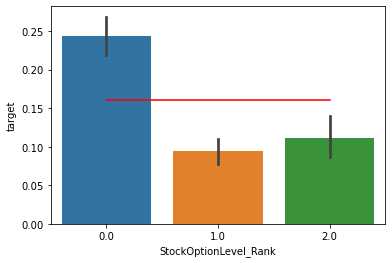

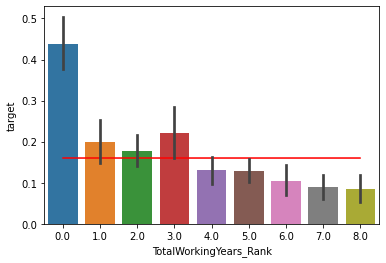

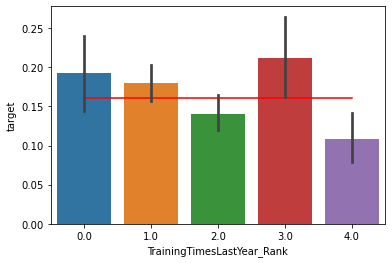

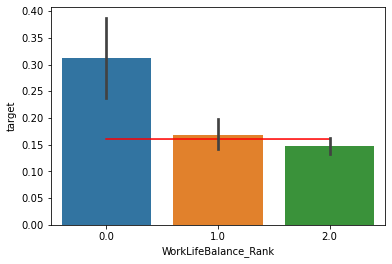

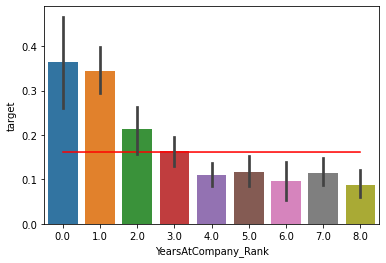

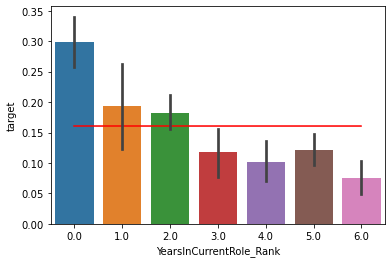

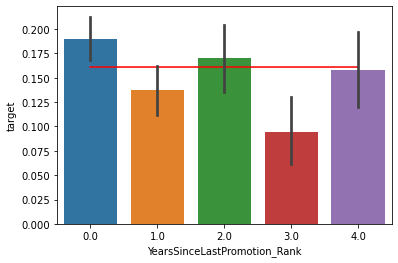

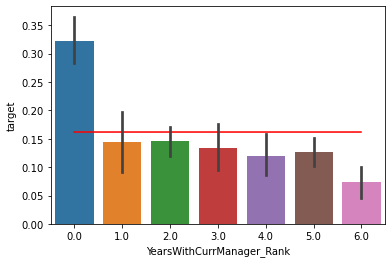

In [26]:
#Check if the features show a slope at all
#If they do, then do you see some deciles below the population average and some higher than population average?
#If that is the case then the slope will be strong
#Conclusion: A strong slope is indicative of the features' ability to discriminate the event from non event
#            making it a good predictor

X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.lineplot(x=col, y=X_bin_combined['target'].mean(),data=X_bin_combined,color='red')
    sns.barplot(x=col,y='target',data=X_bin_combined,estimator=mean)
plt.show()


In [27]:
num_1.shape

(2940, 24)

In [28]:
#Part3:Select K Best
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2,k=15)
selector.fit_transform(num_1, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_num = num_1.iloc[:,cols]

In [29]:
select_features_df_num.dtypes

Age                        float64
DailyRate                    int64
DistanceFromHome             int64
EmployeeNumber             float64
EnvironmentSatisfaction      int64
JobLevel                     int64
JobSatisfaction              int64
MonthlyIncome              float64
MonthlyRate                float64
StockOptionLevel             int64
TotalWorkingYears            int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [30]:
select_features_df_num

,Age,DailyRate,DistanceFromHome,EmployeeNumber,EnvironmentSatisfaction,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,1102,1,30.39,2,2,4,5993.0,19479.0,0,8,6,4,0,5
1,49.0,279,8,30.39,3,2,2,5130.0,24907.0,1,10,10,7,1,7
2,37.0,1373,2,30.39,4,1,3,2090.0,2396.0,0,7,0,0,0,0
3,33.0,1392,3,30.39,4,1,3,2909.0,23159.0,0,8,8,7,3,0
4,27.0,591,2,30.39,1,1,2,3468.0,16632.0,1,6,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,36.0,884,23,2910.61,3,2,4,2571.0,12290.0,1,17,5,2,0,3
2936,39.0,613,6,2910.61,4,3,1,9991.0,21457.0,1,9,7,7,1,7
2937,27.0,155,4,2910.61,2,2,2,6142.0,5174.0,1,6,6,2,0,3
2938,49.0,1023,2,2910.61,4,2,2,5390.0,13243.0,0,17,9,6,0,8


In [31]:
#Feature Selection Categorical Features

char.dtypes

BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
OverTime          object
dtype: object

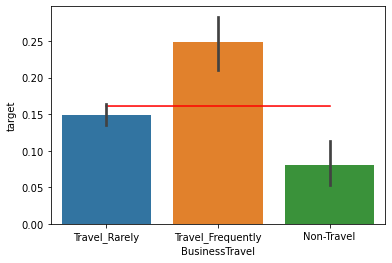

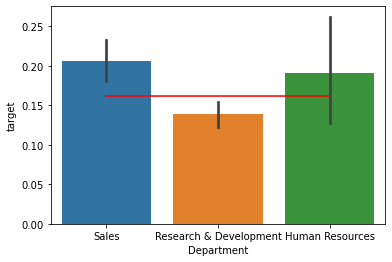

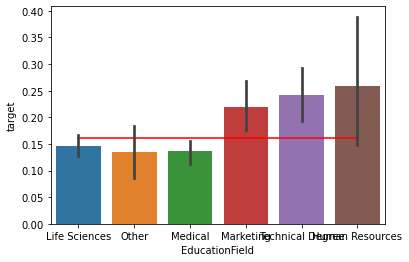

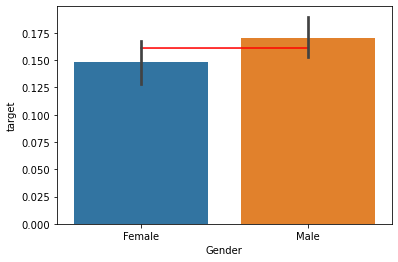

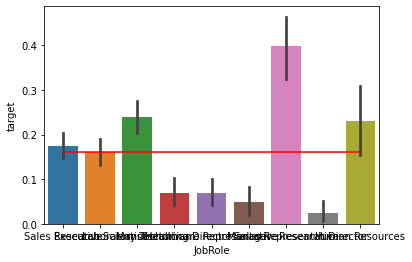

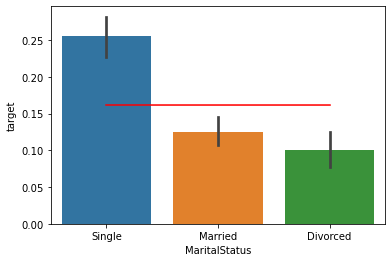

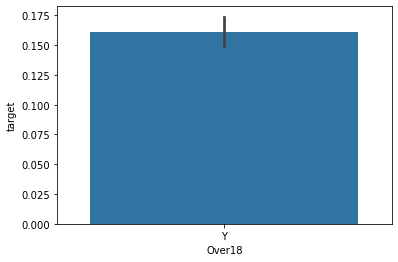

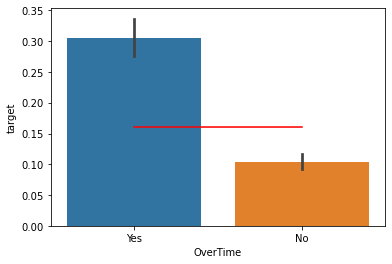

In [32]:
#Part-1:Bivariate Analysis
X_char_merged=pd.concat([Y,char],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.lineplot(x=col, y=X_char_merged['target'].mean(),data=X_char_merged,color='red')
    sns.barplot(x=col, y="target",data=X_char_merged, estimator=mean )
plt.show()

In [33]:
char=char.drop(['Gender','MaritalStatus'],axis=1)

In [34]:
# Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char, drop_first = True)
X_char_dum.shape

(2940, 18)

In [35]:
X_char_dum

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1
1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
3,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2936,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2937,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2938,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [36]:
# Select K Best for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=15)
selector.fit_transform(X_char_dum, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]

In [37]:
select_features_df_char.iloc[0]

BusinessTravel_Travel_Frequently     0
BusinessTravel_Travel_Rarely         1
Department_Research & Development    0
Department_Sales                     1
EducationField_Life Sciences         1
EducationField_Marketing             0
EducationField_Medical               0
EducationField_Technical Degree      0
JobRole_Human Resources              0
JobRole_Laboratory Technician        0
JobRole_Manager                      0
JobRole_Manufacturing Director       0
JobRole_Research Director            0
JobRole_Sales Representative         0
OverTime_Yes                         1
Name: 0, dtype: uint8

In [38]:
#Creating the Master feature for the model development 
X_all=pd.concat([select_features_df_char,select_features_df_num],axis=1,join="inner")
X_all

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Sales Representative,OverTime_Yes,Age,DailyRate,DistanceFromHome,EmployeeNumber,EnvironmentSatisfaction,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,41.0,1102,1,30.39,2,2,4,5993.0,19479.0,0,8,6,4,0,5
1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,49.0,279,8,30.39,3,2,2,5130.0,24907.0,1,10,10,7,1,7
2,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,37.0,1373,2,30.39,4,1,3,2090.0,2396.0,0,7,0,0,0,0
3,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,33.0,1392,3,30.39,4,1,3,2909.0,23159.0,0,8,8,7,3,0
4,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,27.0,591,2,30.39,1,1,2,3468.0,16632.0,1,6,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,36.0,884,23,2910.61,3,2,4,2571.0,12290.0,1,17,5,2,0,3
2936,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,39.0,613,6,2910.61,4,3,1,9991.0,21457.0,1,9,7,7,1,7
2937,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,27.0,155,4,2910.61,2,2,2,6142.0,5174.0,1,6,6,2,0,3
2938,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,49.0,1023,2,2910.61,4,2,2,5390.0,13243.0,0,17,9,6,0,8


In [39]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_all,Y,test_size=0.2,random_state=50)

In [40]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (2352, 30)
Shape of Testing Data (588, 30)
Response Rate in Training Data 0.16071428571428573
Response Rate in Testing Data 0.16326530612244897


In [41]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train_1 = scaler.transform(X_train)  
X_test_1 = scaler.transform(X_test)  

In [42]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=0)
logreg.fit(X_train_1,y_train)

LogisticRegression(random_state=0)

In [43]:
coeff_df=pd.DataFrame(X_all.columns)
coeff_df.columns=['features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])
coeff_df

,features,Coefficient Estimate
0,BusinessTravel_Travel_Frequently,0.569816
1,BusinessTravel_Travel_Rarely,0.349660
2,Department_Research & Development,0.323214
3,Department_Sales,0.570035
4,EducationField_Life Sciences,0.015697
5,EducationField_Marketing,0.105063
6,EducationField_Medical,-0.062168
7,EducationField_Technical Degree,0.238644
8,JobRole_Human Resources,0.312947
9,JobRole_Laboratory Technician,0.372906


In [44]:
# Model Evaluation(Logistic Regression)
y_pred_logreg=logreg.predict(X_test_1)

In [45]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg))
print("Precision",metrics.precision_score(y_test,y_pred_logreg))
print("Recall",metrics.recall_score(y_test,y_pred_logreg))
print("f1_score",metrics.f1_score(y_test,y_pred_logreg))

Accuracy: 0.8877551020408163
Precision 0.75
Recall 0.46875
f1_score 0.5769230769230769


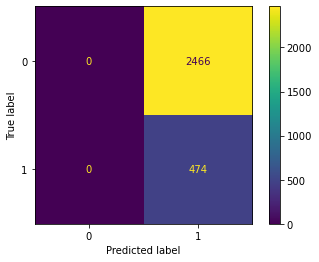

In [46]:
metrics.plot_confusion_matrix(logreg,X_all,Y)

In [47]:
# Building a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=0)

In [48]:
np.random.seed(44)
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250] }
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist,n_jobs = 3)
tree_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 6, 'min_samples_split': 150}


In [49]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=150)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=150, random_state=0)

In [50]:
#Model Evaluation(Decision Tree)
y_pred_tree=dtree.predict(X_test)

In [51]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Accuracy: 0.8401360544217688
Precision 0.5135135135135135
Recall 0.3958333333333333
f1_score 0.44705882352941173


In [52]:
# Building a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=150)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_split=150, random_state=0)

In [53]:
import pandas as pd
feature_importances=pd.DataFrame(rf.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
OverTime_Yes,0.180622
MonthlyIncome,0.128349
TotalWorkingYears,0.101877
YearsWithCurrManager,0.091245
Age,0.079115
StockOptionLevel,0.070560
YearsAtCompany,0.056854
JobLevel,0.053365
YearsInCurrentRole,0.037012
EnvironmentSatisfaction,0.028952


In [54]:
#Model Evaluation(Random Forest)
y_pred_rf=rf.predict(X_test)

In [55]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.8401360544217688
Precision 1.0
Recall 0.020833333333333332
f1_score 0.04081632653061225


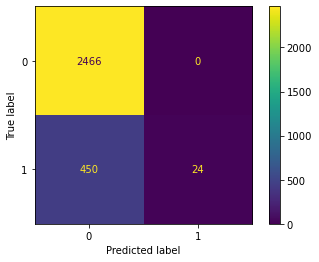

In [56]:
metrics.plot_confusion_matrix(rf,X_all,Y)

In [57]:
# Building a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=6,min_samples_split=150)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', max_depth=6, min_samples_split=150,
                           random_state=0)

In [58]:
import pandas as pd
feature_importances=pd.DataFrame(gbm.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
MonthlyIncome,0.173455
OverTime_Yes,0.094528
DailyRate,0.092118
Age,0.086967
MonthlyRate,0.063090
DistanceFromHome,0.062884
TotalWorkingYears,0.055250
StockOptionLevel,0.052420
JobLevel,0.039611
YearsAtCompany,0.038481


In [59]:
#ModelEvaluation(Gradient Boosting)
y_pred_gbm=gbm.predict(X_test)

In [60]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision",metrics.precision_score(y_test,y_pred_gbm))
print("Recall",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score",metrics.f1_score(y_test,y_pred_gbm))

Accuracy: 0.9149659863945578
Precision 0.8484848484848485
Recall 0.5833333333333334
f1_score 0.691358024691358


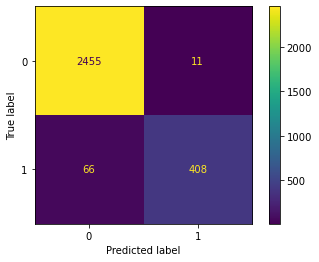

In [61]:
metrics.plot_confusion_matrix(gbm,X_all,Y)

In [62]:
# Building a XGBoost Model
from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=0,criterion='mse',max_depth=6,min_samples_split=150)
xgb.fit(X_train,y_train)

[14:38:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "criterion", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:38:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='mse',
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, min_samples_split=150, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
#Model Evaluation(XGBOOST)
y_pred_xgb=xgb.predict(X_test)

In [64]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_xgb))
print("Precision",metrics.precision_score(y_test,y_pred_xgb))
print("Recall",metrics.recall_score(y_test,y_pred_xgb))
print("f1_score",metrics.f1_score(y_test,y_pred_xgb))

Accuracy: 0.9591836734693877
Precision 0.9285714285714286
Recall 0.8125
f1_score 0.8666666666666666


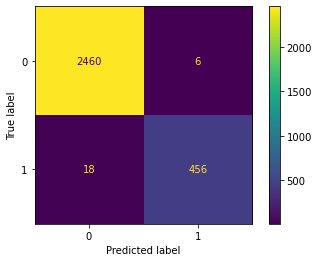

In [65]:
metrics.plot_confusion_matrix(xgb,X_all,Y)

In [66]:
import pandas as pd
feature_importances=pd.DataFrame(xgb.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
JobLevel,0.080065
JobRole_Human Resources,0.076446
JobRole_Sales Representative,0.071682
OverTime_Yes,0.069779
Department_Sales,0.064193
StockOptionLevel,0.052658
BusinessTravel_Travel_Frequently,0.041736
EducationField_Marketing,0.035735
YearsWithCurrManager,0.034497
MonthlyIncome,0.034487


In [94]:
#Copying the Series
fss=f_s.nlargest(10)#copying the series

In [103]:
#df=df_attrition[fss.index]#making the dataframe of only selected features
df=df_attrition.reindex(columns=['JobLevel','StockOptionLevel','YearsWithCurrManager','MonthlyIncome','TotalWorkingYears','YearsSinceLastPromotion','YearsInCurrentRole','YearsAtCompany'])

In [104]:
df.head(10)

,JobLevel,StockOptionLevel,YearsWithCurrManager,MonthlyIncome,TotalWorkingYears,YearsSinceLastPromotion,YearsInCurrentRole,YearsAtCompany
0,2,0,5,5993,8,0,4,6
1,2,1,7,5130,10,1,7,10
2,1,0,0,2090,7,0,0,0
3,1,0,0,2909,8,3,7,8
4,1,1,2,3468,6,2,2,2
5,1,0,6,3068,8,3,7,7
6,1,3,0,2670,12,0,0,1
7,1,1,0,2693,1,0,0,1
8,3,0,8,9526,10,1,7,9
9,2,2,7,5237,17,7,7,7


In [105]:
df.shape

(2940, 8)

In [106]:
#Model Building
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(df, Y, test_size=0.2)

In [110]:
from xgboost import XGBClassifier
xgb_1=XGBClassifier(random_state=0,criterion='mse',max_depth=6,min_samples_split=150)
xgb_1.fit(x_train_1,y_train_1)

[15:09:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "criterion", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:09:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='mse',
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, min_samples_split=150, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [111]:
y_pred_xgb=xgb_1.predict(x_test_1)

In [112]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test_1, y_pred_xgb))
print("Precision",metrics.precision_score(y_test_1,y_pred_xgb))
print("Recall",metrics.recall_score(y_test_1,y_pred_xgb))
print("f1_score",metrics.f1_score(y_test_1,y_pred_xgb))

Accuracy: 0.9472789115646258
Precision 0.8414634146341463
Recall 0.7931034482758621
f1_score 0.8165680473372782


In [67]:
#Lorenz Curve for Decision Tree

In [68]:
y_pred_prob = dtree.predict_proba(X_all)[:, 1]
df_attrition['pred_prob_dtree']=pd.DataFrame(y_pred_prob)
df_attrition['P_Rank_tree']=pd.qcut(df_attrition['pred_prob_dtree'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df_attrition.groupby('P_Rank_tree')['target'].agg(['count','mean'])
rank_df_predicted=df_attrition.groupby('P_Rank_tree')['pred_prob_dtree'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actutal_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_tree',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actutal_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_tree,count,Actutal_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,294,0.632653,0.652456,186.0,186.0,0.392405,0.392405,108.0,108.0,0.043796,0.043796,0.3486,0.1,0.1,1
1,9,294,0.350340,0.348641,103.0,289.0,0.217300,0.609705,191.0,299.0,0.077453,0.121249,0.4885,0.1,0.2,2
2,8,294,0.173469,0.187151,51.0,340.0,0.107595,0.717300,243.0,542.0,0.098540,0.219789,0.4975,0.1,0.3,3
3,7,294,0.105442,0.093954,31.0,371.0,0.065401,0.782700,263.0,805.0,0.106650,0.326440,0.4563,0.1,0.4,4
4,6,294,0.085034,0.087766,25.0,396.0,0.052743,0.835443,269.0,1074.0,0.109084,0.435523,0.3999,0.1,0.5,5
5,5,294,0.091837,0.086995,27.0,423.0,0.056962,0.892405,267.0,1341.0,0.108273,0.543796,0.3486,0.1,0.6,6
6,4,294,0.074830,0.069747,22.0,445.0,0.046414,0.938819,272.0,1613.0,0.110300,0.654096,0.2847,0.1,0.7,7
7,3,294,0.037415,0.032857,11.0,456.0,0.023207,0.962025,283.0,1896.0,0.114761,0.768856,0.1932,0.1,0.8,8
8,2,294,0.044218,0.032857,13.0,469.0,0.027426,0.989451,281.0,2177.0,0.113950,0.882806,0.1066,0.1,0.9,9
9,1,294,0.017007,0.022128,5.0,474.0,0.010549,1.000000,289.0,2466.0,0.117194,1.000000,0.0000,0.1,1.0,10


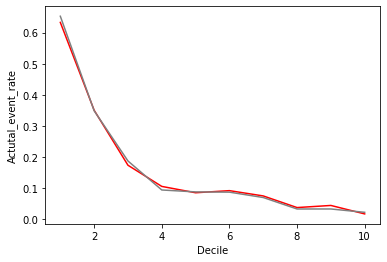

In [69]:
ax = sns.lineplot( x="Decile", y="Actutal_event_rate", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="Predicted_event_rate", data=sorted_reindexed,color='grey')

In [70]:
#Lorenz Curve for Random Forest

In [71]:
y_pred_prob = rf.predict_proba(X_all)[:, 1]
df_attrition['pred_prob_dtree']=pd.DataFrame(y_pred_prob)
df_attrition['P_Rank_tree']=pd.qcut(df_attrition['pred_prob_dtree'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df_attrition.groupby('P_Rank_tree')['target'].agg(['count','mean'])
rank_df_predicted=df_attrition.groupby('P_Rank_tree')['pred_prob_dtree'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actutal_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_tree',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actutal_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_tree,count,Actutal_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,294,0.649660,0.404105,191.0,191.0,0.402954,0.402954,103.0,103.0,0.041768,0.041768,0.3612,0.1,0.1,1
1,9,294,0.367347,0.273476,108.0,299.0,0.227848,0.630802,186.0,289.0,0.075426,0.117194,0.5136,0.1,0.2,2
2,8,294,0.244898,0.207725,72.0,371.0,0.151899,0.782700,222.0,511.0,0.090024,0.207218,0.5755,0.1,0.3,3
3,7,294,0.149660,0.162712,44.0,415.0,0.092827,0.875527,250.0,761.0,0.101379,0.308597,0.5669,0.1,0.4,4
4,6,294,0.054422,0.134882,16.0,431.0,0.033755,0.909283,278.0,1039.0,0.112733,0.421330,0.4880,0.1,0.5,5
5,5,294,0.030612,0.114116,9.0,440.0,0.018987,0.928270,285.0,1324.0,0.115572,0.536902,0.3914,0.1,0.6,6
6,4,294,0.057823,0.097909,17.0,457.0,0.035865,0.964135,277.0,1601.0,0.112328,0.649230,0.3149,0.1,0.7,7
7,3,294,0.030612,0.084486,9.0,466.0,0.018987,0.983122,285.0,1886.0,0.115572,0.764801,0.2183,0.1,0.8,8
8,2,294,0.020408,0.072909,6.0,472.0,0.012658,0.995781,288.0,2174.0,0.116788,0.881590,0.1142,0.1,0.9,9
9,1,294,0.006803,0.055405,2.0,474.0,0.004219,1.000000,292.0,2466.0,0.118410,1.000000,0.0000,0.1,1.0,10


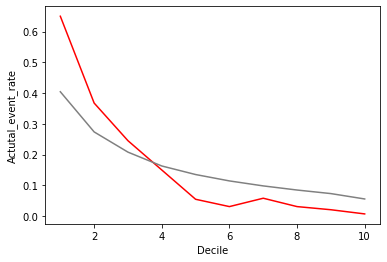

In [72]:
ax = sns.lineplot( x="Decile", y="Actutal_event_rate", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="Predicted_event_rate", data=sorted_reindexed,color='grey')

In [73]:
#Lorenz Curve for XGBOOST

In [74]:
y_pred_prob = xgb.predict_proba(X_all)[:, 1]
df_attrition['pred_prob']=pd.DataFrame(y_pred_prob)
df_attrition['P_Rank_XGB']=pd.qcut(df_attrition['pred_prob'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df_attrition.groupby('P_Rank_XGB')['target'].agg(['count','mean'])
rank_df_predicted=df_attrition.groupby('P_Rank_XGB')['pred_prob'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_XGB',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed['Lift_over_Avg']=sorted_reindexed['Actual_event_rate']/(max(sorted_reindexed['N_events'].cumsum())/max(sorted_reindexed['count'].cumsum()))
sorted_reindexed

,P_Rank_XGB,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile,Lift_over_Avg
0,10,294,0.989796,0.981891,291.0,291.0,0.613924,0.613924,3.0,3.0,0.001217,0.001217,0.6127,0.1,0.1,1,6.139241
1,9,294,0.605442,0.557247,178.0,469.0,0.375527,0.989451,116.0,119.0,0.047040,0.048256,0.9412,0.1,0.2,2,3.755274
2,8,294,0.003401,0.018327,1.0,470.0,0.002110,0.991561,293.0,412.0,0.118816,0.167072,0.8245,0.1,0.3,3,0.021097
3,7,294,0.000000,0.008811,0.0,470.0,0.000000,0.991561,294.0,706.0,0.119221,0.286294,0.7053,0.1,0.4,4,0.000000
4,6,294,0.000000,0.005169,0.0,470.0,0.000000,0.991561,294.0,1000.0,0.119221,0.405515,0.5860,0.1,0.5,5,0.000000
5,5,294,0.003401,0.003121,1.0,471.0,0.002110,0.993671,293.0,1293.0,0.118816,0.524331,0.4693,0.1,0.6,6,0.021097
6,4,294,0.003401,0.001864,1.0,472.0,0.002110,0.995781,293.0,1586.0,0.118816,0.643147,0.3526,0.1,0.7,7,0.021097
7,3,294,0.000000,0.001084,0.0,472.0,0.000000,0.995781,294.0,1880.0,0.119221,0.762368,0.2334,0.1,0.8,8,0.000000
8,2,294,0.006803,0.000549,2.0,474.0,0.004219,1.000000,292.0,2172.0,0.118410,0.880779,0.1192,0.1,0.9,9,0.042194
9,1,294,0.000000,0.000182,0.0,474.0,0.000000,1.000000,294.0,2466.0,0.119221,1.000000,0.0000,0.1,1.0,10,0.000000


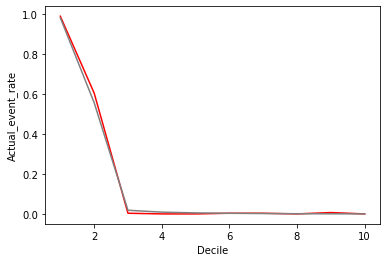

In [75]:
ax = sns.lineplot( x="Decile", y="Actual_event_rate", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="Predicted_event_rate", data=sorted_reindexed,color='grey')

In [76]:
#Some Project Conclusion
#XGB model has performed the best among all the model and used to control the Attrition rate in model
#A-Audience
#P-Priotization
#T-Treatment

In [77]:
#Audience
df_attrition['Predicted_Rank']=np.where(df_attrition['P_Rank_XGB']>7,"Top3","Bottom7")
df_attrition['Predicted_Rank'].value_counts()

Bottom7    2058
Top3        882
Name: Predicted_Rank, dtype: int64

In [78]:
df_top3=df_attrition.loc[df_attrition['Predicted_Rank']=='Top3',:]
df_top3.shape

(882, 40)

In [79]:
df_top3.dtypes

Age                           int64
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours                 int64
StockOptionLevel              int64
TotalWorkingYears           

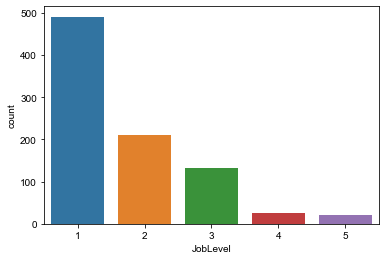

In [80]:
#Treatment Analysis
ax=sns.countplot(x="JobLevel",data=df_top3)
sns.set(rc = {'figure.figsize':(20,8)})

In [81]:
df_attrition['JobLevel_deciles']=pd.qcut(df_attrition['JobLevel'].rank(method='first').values,10,duplicates='drop').codes+1

In [82]:
df_attrition.groupby('JobLevel_deciles')['JobLevel'].agg(['min','max','median'])

,min,max,median
JobLevel_deciles,,,
1,1,1,1
2,1,1,1
3,1,1,1
4,1,2,1
5,2,2,2
6,2,2,2
7,2,2,2
8,2,3,3
9,3,4,3


In [83]:
df_attrition['JobLevel'].median()

2.0

In [84]:
df_attrition['JobLevel_segment']=np.where(df_attrition['JobLevel_deciles']>=9,"High JobLevel","Low JobLevel")
df_attrition['JobLevel_segment'].value_counts()

Low JobLevel     2352
High JobLevel     588
Name: JobLevel_segment, dtype: int64

In [85]:
pd.crosstab(index=df_attrition['JobLevel_segment'],columns=df_attrition['JobLevel'],values=df_attrition['pred_prob'],aggfunc='mean')

JobLevel,1,2,3,4,5
JobLevel_segment,,,,,
High JobLevel,NaN,NaN,0.144883,0.0397,0.071053
Low JobLevel,0.258528,0.095425,0.144568,NaN,NaN


In [86]:
pd.crosstab(index=df_attrition['JobLevel_segment'],columns=df_attrition['JobLevel'],values=df_attrition['pred_prob'],aggfunc='count')

JobLevel,1,2,3,4,5
JobLevel_segment,,,,,
High JobLevel,NaN,NaN,238.0,212.0,138.0
Low JobLevel,1086.0,1068.0,198.0,NaN,NaN


In [87]:
#Priotization
#Provide Job level 3,4,5 to the employees.

In [115]:
import pickle
with open('xgb_1.pkl', 'wb') as wr:
   pickle.dump(xgb_1, wr)